In [1]:
# Simulación Monte Carlo: una mirada amigable y lúdica:
# https://medium.com/@claudiog/simulaci%C3%B3n-monte-carlo-una-mirada-amigable-y-l%C3%BAdica-ac6ec5c79ee0
#
# por Claudio Gelmi
# https://www.linkedin.com/in/claudiogelmi/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
# Crear el Dictionary
M = {1: 38, 4: 14, 9: 31, 16: 6, 21: 42, 28: 84, 36: 44, 47: 26, 49: 11,
     51: 67, 56: 53, 62: 19, 64: 60, 71: 91, 80: 100, 87: 24, 93: 73,
     95: 75, 98: 78}

rng = np.random.default_rng(seed=33)

# Simulación de un juego
def juego(M):
    jugada = 1
    lugar = rng.integers(1,6,endpoint=True)
    while lugar!=100 and lugar!=80:
        # Revisamos resbalines o escaleras
        if lugar in M.keys():
            lugar = M.get(lugar)
        # Verificamos si rebota o no, y si cae en algun resbalín cercano, tal como 95 o 98
        if lugar > 100:    
            lugar = 100-(lugar-100)
            if lugar in [95,98]:
                lugar = M.get(lugar)
        # Seguimos tirando el dado
        dado = rng.integers(1,6,endpoint=True)
        lugar += dado
        jugada += 1
    return jugada


In [4]:
# Probemos...
juego(M)

28

La cantidad mínima de jugadas: 7
- Promedio: 42.9
- Mediana: 35.0
- Moda: 24 y su frecuencia 243.


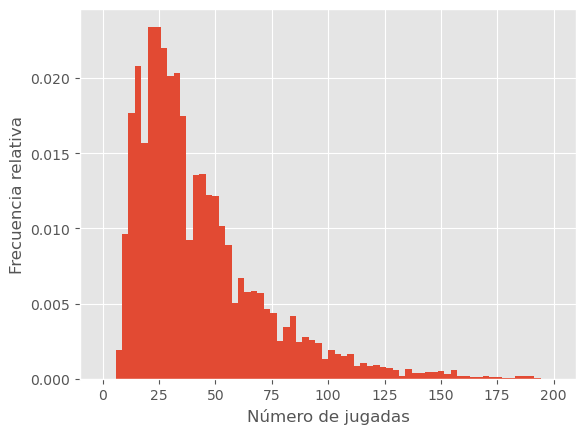

In [5]:
# Análisis de Resultados

# Hagamos Monte Carlo...Jugamos 10_000 veces
historia = [juego(M) for i in range(10_000)]
print('La cantidad mínima de jugadas:', min(historia))

# Estadística Descriptiva
# Promedio
print('- Promedio:', round(np.mean(historia),1))
# Mediana
print('- Mediana:', round(np.median(historia),1))
# La moda
moda = mode(historia)
print(f"- Moda: {moda.mode} y su frecuencia {moda.count}.")

# Graficamos Histograma
plt.style.use('ggplot')
plt.hist(historia, bins=70, density=True, range=(0,200))
plt.xlabel('Número de jugadas')
plt.ylabel('Frecuencia relativa')
plt.show()

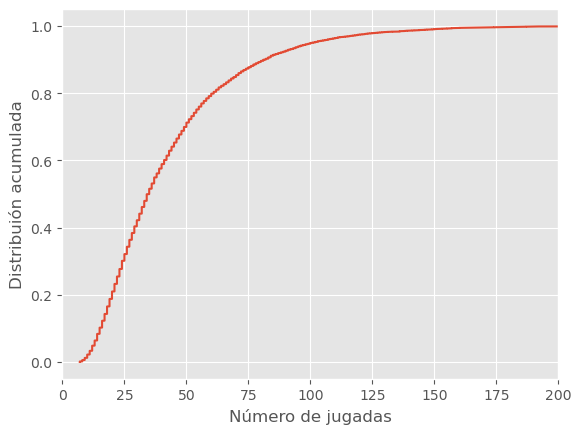

- El número de jugadas para tener un 50.0% probabilidad es: 35.


In [6]:
# Curva Empírica Acumulada (ECDF)

# Grafica
ecdf = ECDF(historia)
plt.plot(ecdf.x,ecdf.y)
plt.xlabel('Número de jugadas')
plt.ylabel('Distribuión acumulada')
plt.xlim(0,200)
plt.show()

# Interpolamos la curva para obtener el valor que entrega el 50%
proba = 0.5
f = np.interp(proba, ecdf.y, ecdf.x)
print(f"- El número de jugadas para tener un {proba*100}% probabilidad es: {f:.0f}.")
